### This Notebook is Where I created Charts and Looked at the Sentiment Analysis in Depth

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
import random
from PIL import Image

### Read in data/Check Data

In [2]:
#read in csv of all tweets with sentiment analysis
df = pd.read_csv('All_Tweets_with_Sentiment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477022 entries, 0 to 477021
Data columns (total 18 columns):
id                 477022 non-null int64
author_id          477022 non-null int64
text               477022 non-null object
retweets           477022 non-null int64
permalink          477022 non-null object
date               477022 non-null object
formatted_date     477022 non-null object
favorites          477022 non-null int64
mentions           94591 non-null object
hashtags           63675 non-null object
urls               110853 non-null object
search_term        477022 non-null object
day                477022 non-null int64
month              477022 non-null int64
year               477022 non-null int64
hour               477022 non-null int64
text_clean         475877 non-null object
Sentiment_Score    477022 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 65.5+ MB


### Remove bloomberg data from early debates (where he wasn't in the race), do some other data cleaning

In [3]:
#Remove Bloomberg From first 6 debates
df = df.drop(df[(df.search_term == 'bloomberg') & (df.month == 6)].index)
df = df.drop(df[(df.search_term == 'bloomberg') & (df.month == 7)].index)
df = df.drop(df[(df.search_term == 'bloomberg') & (df.month == 9)].index)
df = df.drop(df[(df.search_term == 'bloomberg') & (df.month == 10)].index)
df = df.drop(df[(df.search_term == 'bloomberg') & (df.month == 11)].index)
df = df.drop(df[(df.search_term == 'bloomberg') & (df.month == 12)].index)

#Removing Steyer (Wasn't tweeted about much, and not as relevant to overall election)
df = df.drop(df[df.search_term == 'steyer'].index)

#Adding in Feature for Potential Analysis
df.retweets = df.retweets + 1
df['sent*RT'] = df.retweets * df.Sentiment_Score

#Rename Candidates
df['search_term'] = df.search_term.replace('biden', 'Joe Biden')
df['search_term'] = df.search_term.replace('bloomberg', 'Mike Bloomberg')
df['search_term'] = df.search_term.replace('buttigieg', 'Pete Buttigieg')
df['search_term'] = df.search_term.replace('klobuchar', 'Amy Klobuchar')
df['search_term'] = df.search_term.replace('sanders', 'Bernie Sanders')
df['search_term'] = df.search_term.replace('warren', 'Elizabeth Warren')

#Renaming Column
df = df.rename(columns={"search_term": "Candidates"})

In [4]:
#Test Positive Tweet
test = df.sort_values(by='Sentiment_Score')[['text', 'Candidates', 'Sentiment_Score', 'retweets']].reset_index()
test.text[300002]

'Since when is Buttigieg in the same league as Bloomberg. The guy still has outstanding student debt.'

### More cleaning

In [5]:
#Parsing through the date and adding day/month/year/hour to the dataframe
debate = []
month = list(df.month)
day = list(df.day)
for index,m in enumerate(month):
    if m == 6:
        debate.append('Debate 1')
    elif m == 7:
        debate.append('Debate 2')
    elif m == 9:
        debate.append('Debate 3')
    elif m == 10:
        debate.append('Debate 4')
    elif m == 11:
        debate.append('Debate 5')
    elif m == 12:
        debate.append('Debate 6')
    elif m == 1:
        debate.append('Debate 7')
    elif m == 2 and day[index] == 7:
        debate.append('Debate 8')
    elif m == 2 and day[index] == 19:
        debate.append('Debate 9')
    elif m == 2 and day[index] == 25:
        debate.append('Debate10')
        
#Adding to df
df['Debate'] = debate

### Looking at the data by candidate and by debate

In [6]:
#Count of Data for Each Candidate (I plot this later down)
df.groupby(['Candidates', 'Debate']).count()

id  author_id  text  retweets  permalink  date  \
Candidates       Debate                                                       
Amy Klobuchar    Debate 1  4093       4093  4093      4093       4093  4093   
                 Debate 2  2776       2776  2776      2776       2776  2776   
                 Debate 3  4287       4287  4287      4287       4287  4287   
                 Debate 4  4301       4301  4301      4301       4301  4301   
                 Debate 5  2092       2092  2092      2092       2092  2092   
                 Debate 6  3041       3041  3041      3041       3041  3041   
                 Debate 7  4942       4942  4942      4942       4942  4942   
                 Debate 8  9794       9794  9794      9794       9794  9794   
                 Debate 9  9839       9839  9839      9839       9839  9839   
                 Debate10  9897       9897  9897      9897       9897  9897   
Bernie Sanders   Debate 1  4917       4917  4917      4917       4917  4917   
                 Debate 2  4876       4876  4876      4876       4876  4876   
                 Debate 3  9739       9739  9739      9739       9739  9739   
                 Debate 4  9617       9617  9617      9617       9617  9617   
                 Debate 5  9642       9642  9642      9642       9642  9642   
                 Debate 6  9772       9772  9772      9772       9772  9772   
                 Debate 7  4801       4801  4801      4801       4801  4801   
                 Debate 8  9618       9618  9618      9618       9618  9618   
                 Debate 9  9794       9794  9794      9794       9794  9794   
                 Debate10  9624       9624  9624      9624       9624  9624   
Elizabeth Warren Debate 1  9730       9730  9730      9730       9730  9730   
                 Debate 2  4891       4891  4891      4891       4891  4891   
                 Debate 3  9839       9839  9839      9839       9839  9839   
                 Debate 4  9796       9796  9796      9796       9796  9796   
                 Debate 5  9789       9789  9789      9789       9789  9789   
                 Debate 6  9805       9805  9805      9805       9805  9805   
                 Debate 7  9805       9805  9805      9805       9805  9805   
                 Debate 8  4913       4913  4913      4913       4913  4913   
                 Debate 9  9792       9792  9792      9792       9792  9792   
                 Debate10  9702       9702  9702      9702       9702  9702   
Joe Biden        Debate 1  4917       4917  4917      4917       4917  4917   
                 Debate 2  4846       4846  4846      4846       4846  4846   
                 Debate 3  9823       9823  9823      9823       9823  9823   
                 Debate 4  9731       9731  9731      9731       9731  9731   
                 Debate 5  9871       9871  9871      9871       9871  9871   
                 Debate 6  9836       9836  9836      9836       9836  9836   
                 Debate 7  9863       9863  9863      9863       9863  9863   
                 Debate 8  4948       4948  4948      4948       4948  4948   
                 Debate 9  9709       9709  9709      9709       9709  9709   
                 Debate10  9846       9846  9846      9846       9846  9846   
Mike Bloomberg   Debate 7  4979       4979  4979      4979       4979  4979   
                 Debate 8  9973       9973  9973      9973       9973  9973   
                 Debate 9  9993       9993  9993      9993       9993  9993   
                 Debate10  9975       9975  9975      9975       9975  9975   
Pete Buttigieg   Debate 1  4855       4855  4855      4855       4855  4855   
                 Debate 2  4750       4750  4750      4750       4750  4750   
                 Debate 3  7799       7799  7799      7799       7799  7799   
                 Debate 4  9656       9656  9656      9656       9656  9656   
                 Debate 5  9696       9696  9696      9696       9696  9696   


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423246 entries, 0 to 477021
Data columns (total 20 columns):
id                 423246 non-null int64
author_id          423246 non-null int64
text               423246 non-null object
retweets           423246 non-null int64
permalink          423246 non-null object
date               423246 non-null object
formatted_date     423246 non-null object
favorites          423246 non-null int64
mentions           82202 non-null object
hashtags           54484 non-null object
urls               91802 non-null object
Candidates         423246 non-null object
day                423246 non-null int64
month              423246 non-null int64
year               423246 non-null int64
hour               423246 non-null int64
text_clean         422271 non-null object
Sentiment_Score    423246 non-null float64
sent*RT            423246 non-null float64
Debate             423246 non-null object
dtypes: float64(2), int64(8), object(10)
memory usage: 67.

In [8]:
df.retweets.quantile(q=0.999)

407.75500000006286

In [9]:
# df.loc[df.retweets >= 0].groupby(['Candidates', 'Debate'])['sent*RT'].agg(['mean', 'median', 'mad', 'count'])
df.loc[df.retweets >= 5].groupby(['Candidates', 'Debate'])['Sentiment_Score'].agg(['mean', 'median', 'mad', 'count'])

mean  median       mad  count
Candidates       Debate                                     
Amy Klobuchar    Debate 1  0.482396   0.500  0.092274    217
                 Debate 2  0.515724   0.510  0.086965    152
                 Debate 3  0.518971   0.510  0.078518    204
                 Debate 4  0.510794   0.510  0.094076    189
                 Debate 5  0.511187   0.510  0.110372    160
                 Debate 6  0.500631   0.510  0.086970    222
                 Debate 7  0.501250   0.510  0.096443    272
                 Debate 8  0.503573   0.510  0.097009    347
                 Debate 9  0.486879   0.500  0.097785    439
                 Debate10  0.489498   0.510  0.109237    538
Bernie Sanders   Debate 1  0.452882   0.500  0.128424    170
                 Debate 2  0.477288   0.500  0.120772    177
                 Debate 3  0.466806   0.500  0.117910    288
                 Debate 4  0.441241   0.490  0.126637    266
                 Debate 5  0.484240   0.500  0.102637    342
                 Debate 6  0.468815   0.500  0.113744    346
                 Debate 7  0.432041   0.420  0.122030    147
                 Debate 8  0.433976   0.440  0.122683    337
                 Debate 9  0.432705   0.455  0.132531    292
                 Debate10  0.441459   0.490  0.123241    281
Elizabeth Warren Debate 1  0.459418   0.500  0.134514    292
                 Debate 2  0.477206   0.500  0.104012    204
                 Debate 3  0.482248   0.500  0.111246    427
                 Debate 4  0.433011   0.450  0.134375    362
                 Debate 5  0.451012   0.480  0.121587    504
                 Debate 6  0.456965   0.490  0.133047    514
                 Debate 7  0.410296   0.410  0.130081    270
                 Debate 8  0.473946   0.500  0.133876    185
                 Debate 9  0.456344   0.490  0.121684    279
                 Debate10  0.448641   0.470  0.130470    287
Joe Biden        Debate 1  0.460103   0.500  0.118850    194
                 Debate 2  0.449227   0.480  0.117157    181
                 Debate 3  0.472827   0.500  0.103634    382
                 Debate 4  0.408061   0.410  0.119325    361
                 Debate 5  0.399653   0.410  0.115578    547
                 Debate 6  0.443712   0.435  0.111326    326
                 Debate 7  0.427183   0.410  0.112444    426
                 Debate 8  0.458172   0.490  0.106756    186
                 Debate 9  0.439003   0.470  0.118402    291
                 Debate10  0.436969   0.450  0.114871    353
Mike Bloomberg   Debate 7  0.426238   0.440  0.119824    303
                 Debate 8  0.423737   0.420  0.128995    479
                 Debate 9  0.409023   0.410  0.131927    481
                 Debate10  0.410366   0.410  0.128368    465
Pete Buttigieg   Debate 1  0.515118   0.520  0.097084    211
                 Debate 2  0.490379   0.500  0.099576    211
                 Debate 3  0.493800   0.500  0.107194    450
                 Debate 4  0.482629   0.500  0.114344    388
                 Debate 5  0.475868   0.490  0.104857    484
                 Debate 6  0.493793   0.500  0.101863    588
                 Debate 7  0.497174   0.510  0.089517    453
                 Debate 8  0.441493   0.480  0.116731    442
                 Debate 9  0.444764   0.480  0.118180    275
                 Debate10  0.472071   0.500  0.108975    367

### Color Schemes

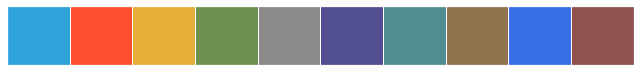

In [10]:
#Figuring out color schemes

import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()

#A simple FiveThirtyEight palette for Seaborn plots.

import seaborn as sns
import matplotlib.pyplot as plt

#Color Palette
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
    "#524f90",
    "#4f8d90",
    "#90734f",
    "#386fe5",
    "#90524f"
]

sns.set_palette(five_thirty_eight)
sns.palplot(sns.color_palette())
plt.show()

COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

### Candidate Sentiment Analysis by Debate

In [11]:
#Some lists for looping to create charts
debate = sorted(list(df.Debate.unique()))
candidate = list(df.Candidates.unique())

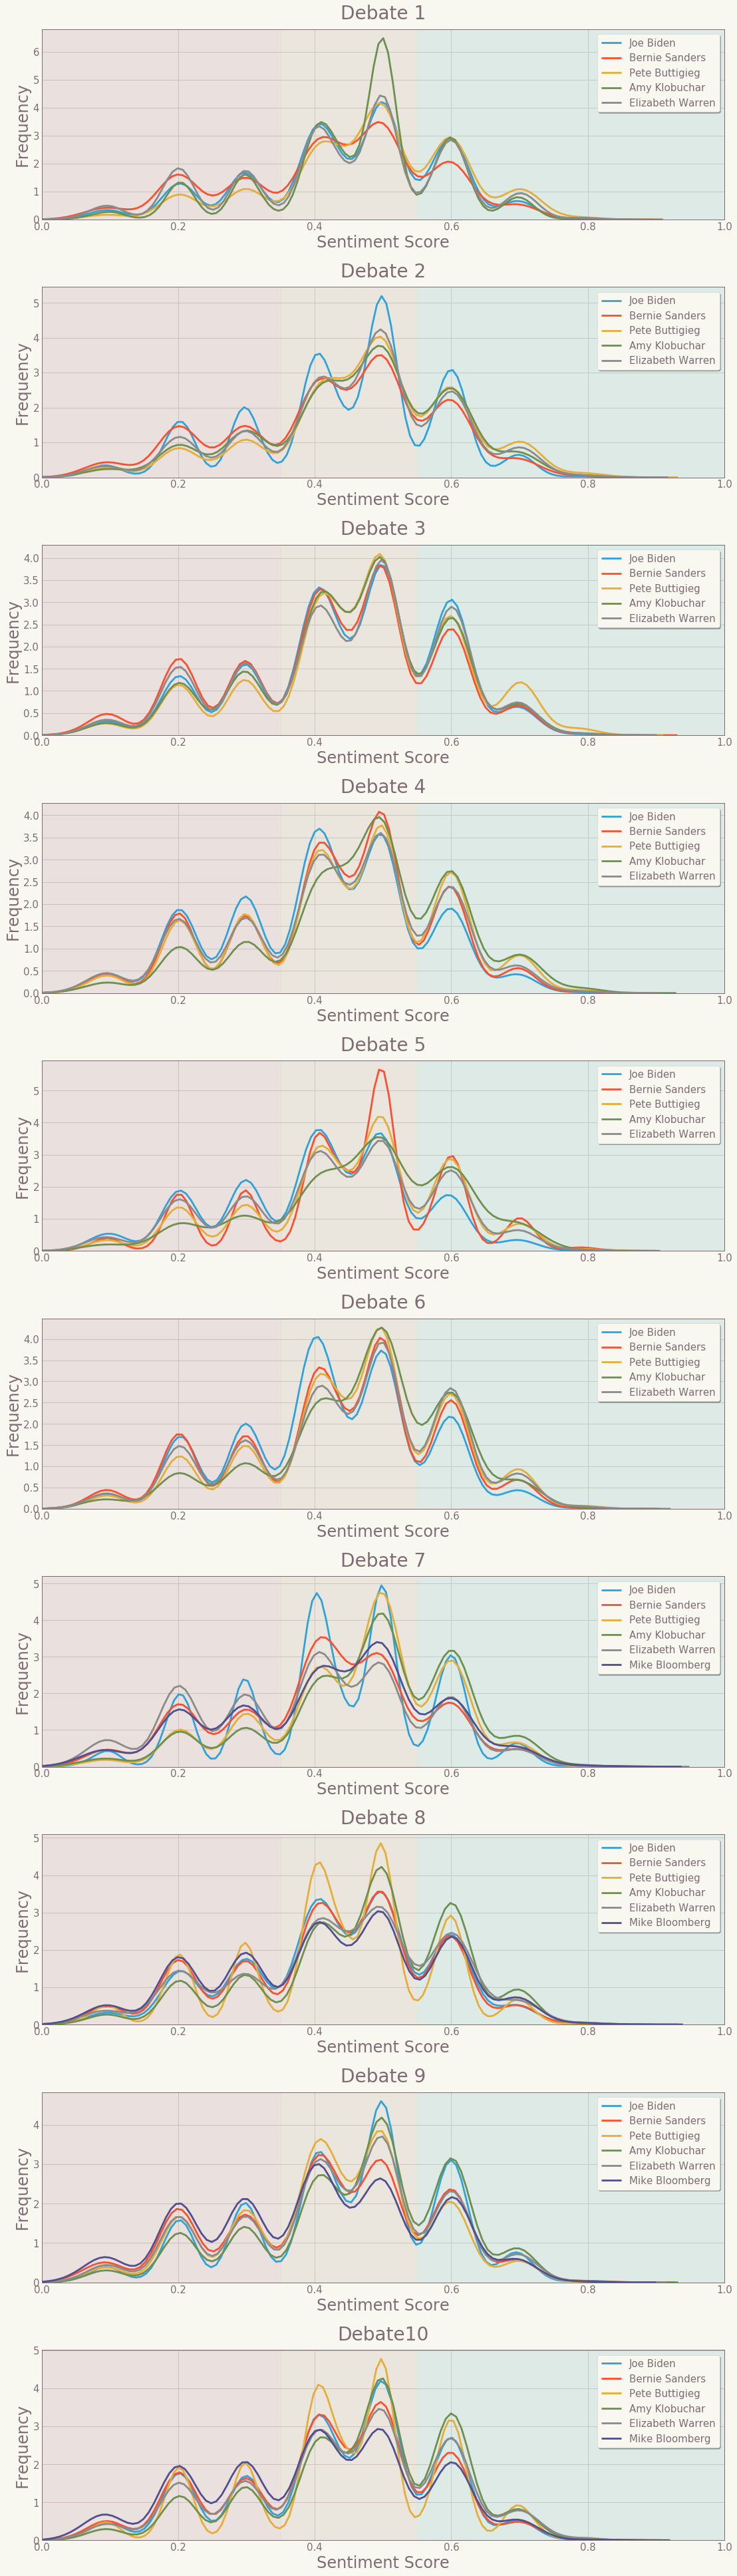

In [191]:
nrows = len(debate)
ncols = len(candidate)
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(17, 55))
fig.tight_layout(pad=6)
fig.patch.set_facecolor('#f8f7f0')

#For Loop to plot sentiment for each candidate by debate
for index,d in enumerate(debate):
    
    ax = axes[index]
    ax.set_title(d, size = 28)

    for i,c in enumerate(candidate):
        
        #Set Style
        plt.style.use('fivethirtyeight')
        sns.set_palette(five_thirty_eight)
        
        #Background Color
        plt.grid(color='#d0c7cb')
        
        #filter dataframe for plotting and plot
        df_filtered = df[df.Debate == d]
        df_filtered = df_filtered[df_filtered.Candidates == c].rename({'Sentiment_Score' : c}, axis=1)
        sns.kdeplot(df_filtered[c], ax = ax, linewidth=2.8)  
        
        #Set More Colors for Consistency
        ax.axvspan(0, 0.35, facecolor='#e77f79', alpha=0.02)
        ax.axvspan(0.35, 0.55, facecolor='#e7b679', alpha=0.02)
        ax.axvspan(0.55, 1, facecolor='#79e7b6', alpha=0.02)
        ax.set_xlim(0, 1)
        
        ax.tick_params(axis='both', labelsize=15)
        
        #Setting Legend
        legend = ax.legend(shadow=True)
        legend.get_frame().set_facecolor('#f8f7f0')
        
        #Text Color & Border Color
        COLOR = '#7e6b73'
        plt.rcParams['text.color'] = COLOR
        plt.rcParams['axes.labelcolor'] = COLOR
        plt.rcParams['xtick.color'] = COLOR
        plt.rcParams['ytick.color'] = COLOR
        ax.spines['top'].set_color(COLOR)
        ax.spines['left'].set_color(COLOR)
        ax.spines['right'].set_color(COLOR)
        ax.spines['bottom'].set_color(COLOR)

        #Set Border
        ax.spines['top'].set_linewidth(1)
        ax.spines['left'].set_linewidth(1)
        ax.spines['right'].set_linewidth(1)
        ax.spines['bottom'].set_linewidth(1)
        
        #Access Labels
        ax.set_xlabel('Sentiment Score', size = 24)
        ax.set_ylabel('Frequency', size = 24)

In [192]:
fig.savefig("plot.png", facecolor=fig.get_facecolor(), figsize=(19.20,10.80))

## Sent Analysis by Debate 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


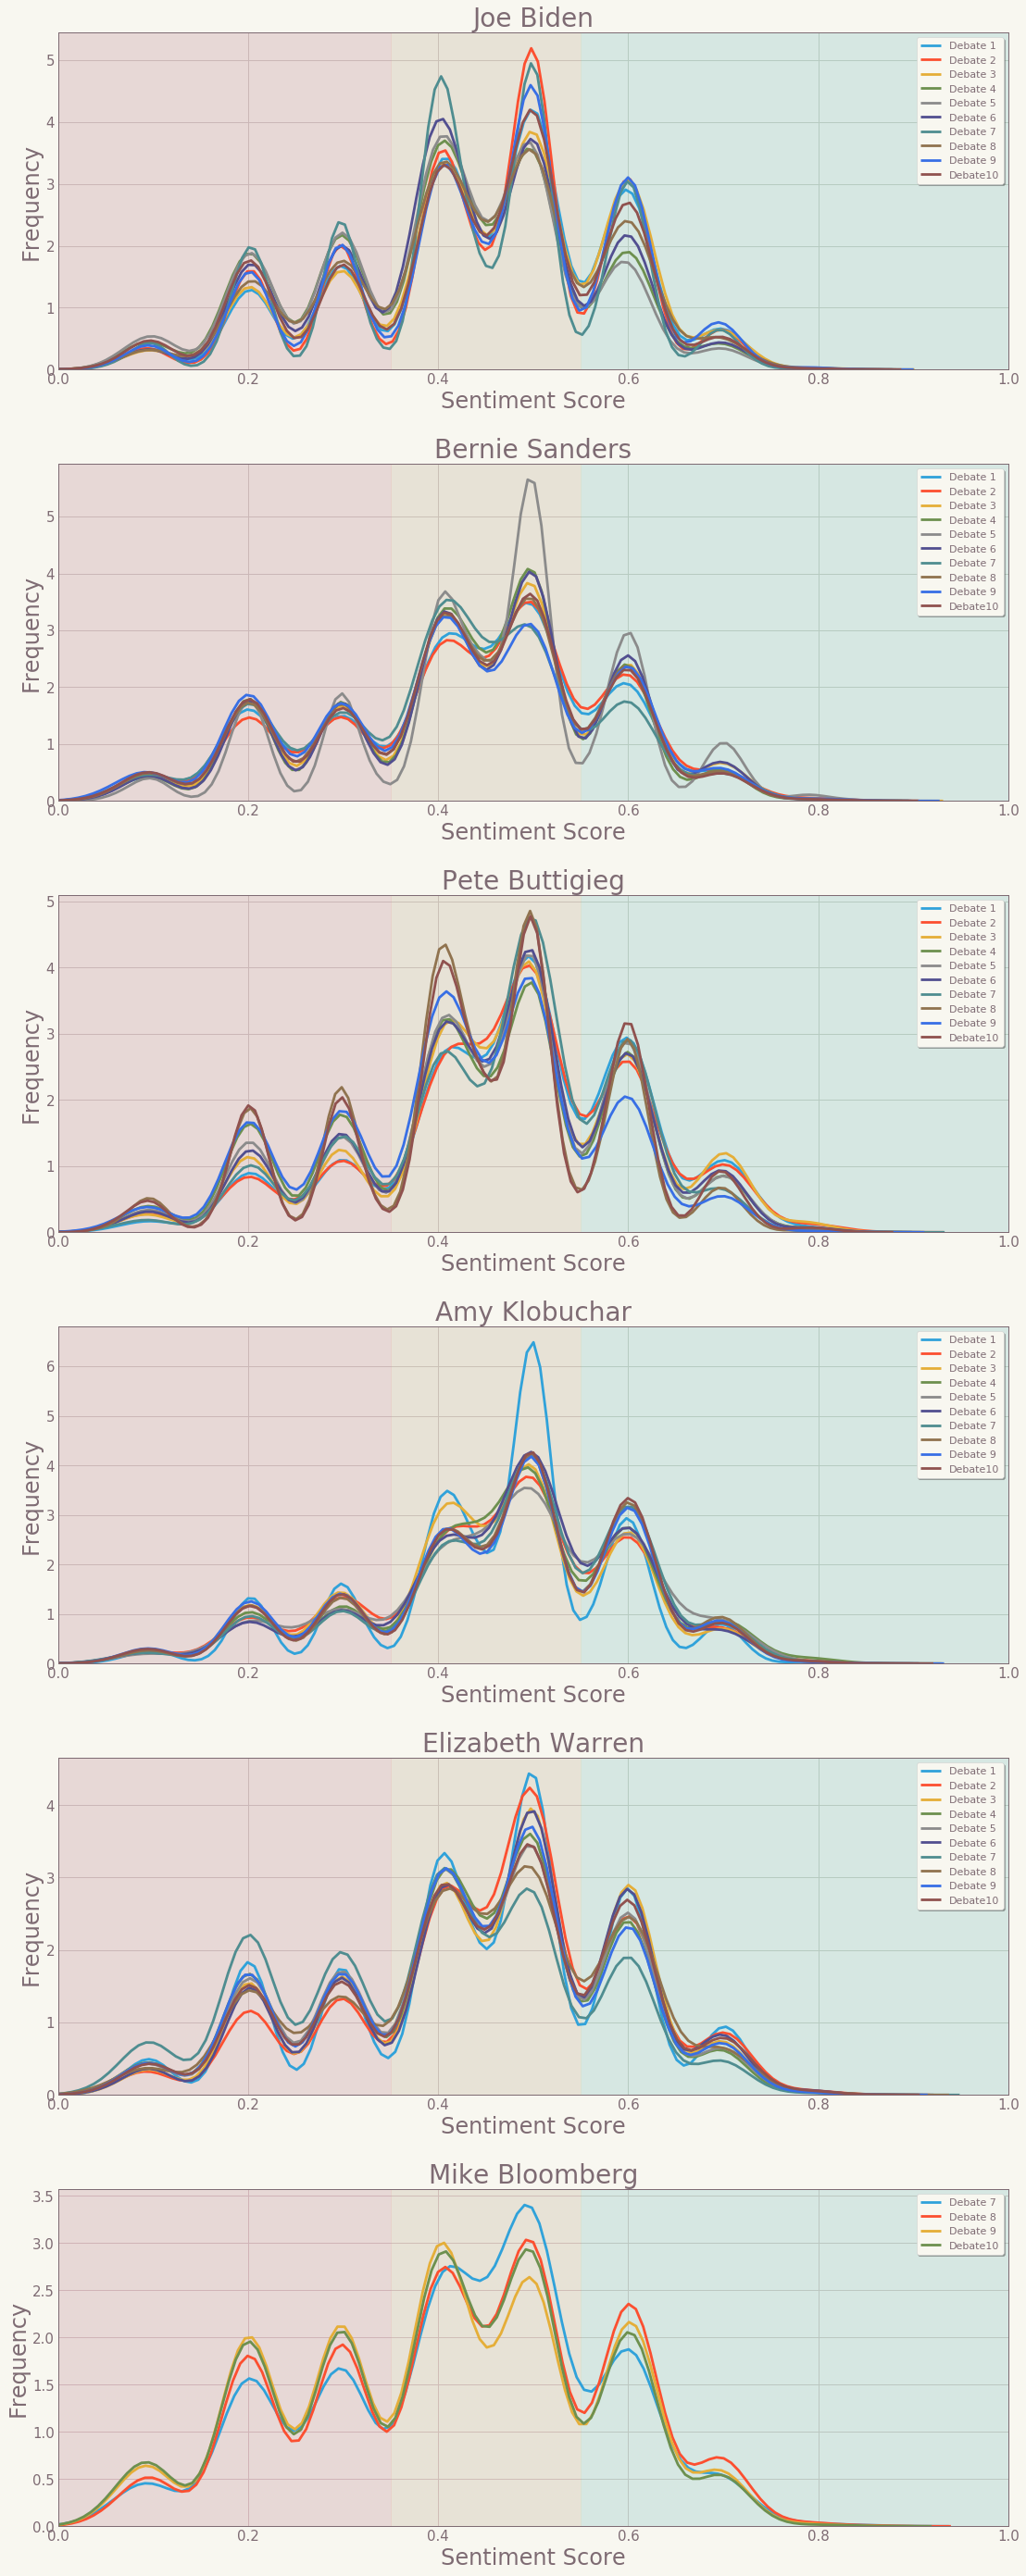

In [13]:
#Define fig and set some params
fig, axes = plt.subplots(nrows=ncols, ncols=1, figsize=(17, 40))
fig.tight_layout(pad=6)
fig.patch.set_facecolor('#f8f7f0')

#For loop to plot sentiment for each candidate for all debates
for index,c in enumerate(candidate):

    ax = axes[index]
    ax.set_title(c, size = 28)
    for i,d in enumerate(debate):
        
        #Set Style
        plt.style.use('fivethirtyeight')
        sns.set_palette(five_thirty_eight)
        
        #Filter & Plot
        df_filtered = df[df.Debate == d]
        df_filtered = df_filtered[df_filtered.Candidates == c].rename({'Sentiment_Score' : d}, axis=1)
        sns.kdeplot(df_filtered[d], ax = ax, linewidth=2.8)  
        
        #Set Colors
        ax.axvspan(0, 0.35, facecolor='#e77f79', alpha=0.02)
        ax.axvspan(0.35, 0.55, facecolor='#e7b679', alpha=0.02)
        ax.axvspan(0.55, 1, facecolor='#79e7b6', alpha=0.02)
        ax.set_xlim(0, 1)
        
        ax.tick_params(axis='both', labelsize=15)
        
        #Setting Legend
        legend = ax.legend(shadow=True)
        legend.get_frame().set_facecolor('#f8f7f0')
        
        #Text Color & Border Color
        COLOR = '#7e6b73'
        plt.rcParams['text.color'] = COLOR
        plt.rcParams['axes.labelcolor'] = COLOR
        plt.rcParams['xtick.color'] = COLOR
        plt.rcParams['ytick.color'] = COLOR
        plt.grid(color='#d0c7cb')
        ax.spines['top'].set_color(COLOR)
        ax.spines['left'].set_color(COLOR)
        ax.spines['right'].set_color(COLOR)fg
        ax.spines['bottom'].set_color(COLOR)

        #Set Border
        ax.spines['top'].set_linewidth(1)
        ax.spines['left'].set_linewidth(1)
        ax.spines['right'].set_linewidth(1)
        ax.spines['bottom'].set_linewidth(1)
        
        #Axis titles
        ax.set_xlabel('Sentiment Score', size =24)
        ax.set_ylabel('Frequency', size = 24)

### Average Sent Analysis for each candidate during each debate

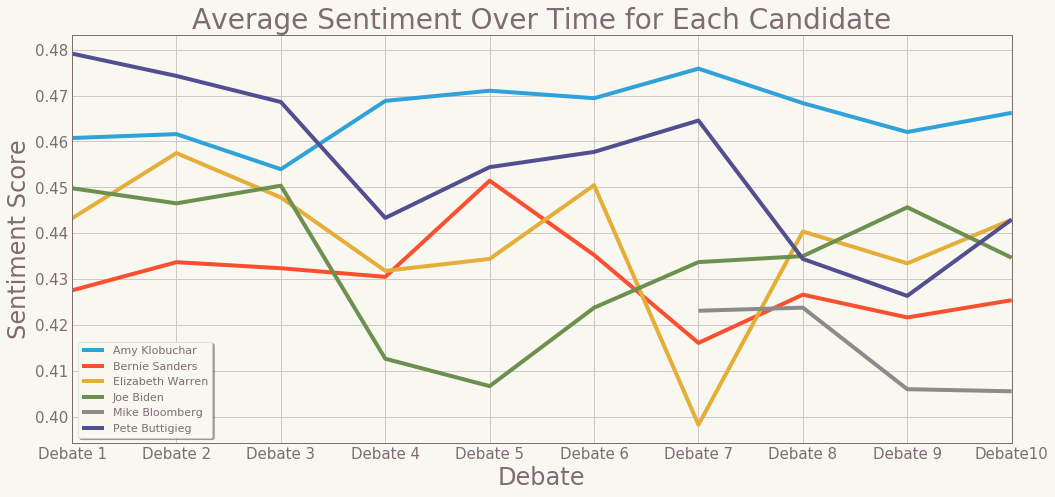

In [14]:
#Set Figure & Color
fig, ax = plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('#f8f7f0')

#Axis Titles and Edits/Set Color of Fig
ax.set_title("Average Sentiment Over Time for Each Candidate", size = 28)
plt.ylabel('Sentiment Score', size = 24)
plt.xlabel('Debates', size = 24)
plt.style.use('fivethirtyeight')
ax.patch.set_facecolor('#f8f7f0')

ax.tick_params(axis='both', labelsize=15)

#This is just the plot
df.loc[df.retweets >= 0].groupby(['Debate', 'Candidates'])['Sentiment_Score'].mean().unstack().plot(ax=ax)

#Setting Legend
legend = ax.legend(shadow=True)
legend.get_frame().set_facecolor('#f8f7f0')

#Text Color & Border Color
COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.grid(color='#d0c7cb')
ax.spines['top'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['bottom'].set_color(COLOR)


#Set Border
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.show()

In [15]:
fig.savefig("plot.png", facecolor=fig.get_facecolor(), figsize=(19.20,10.80))

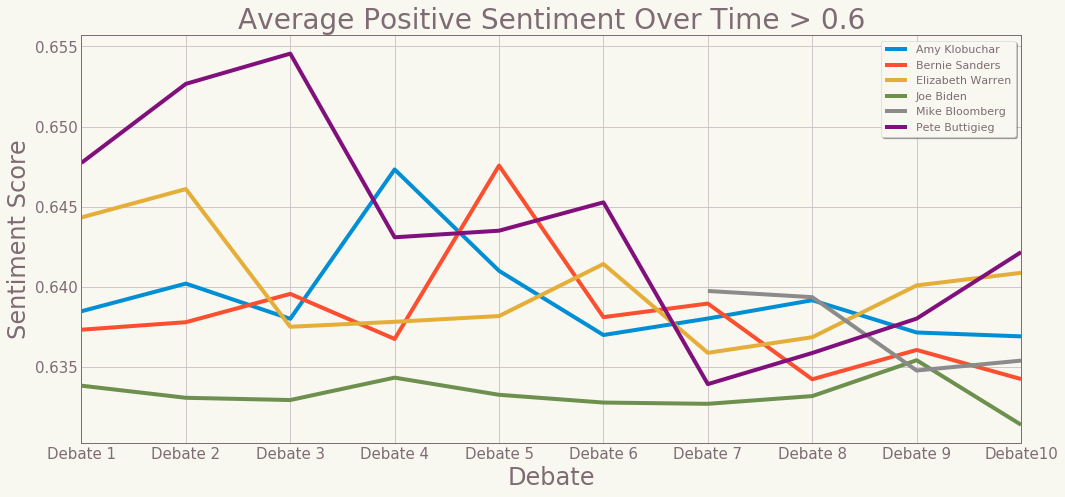

In [16]:
#Set Figure & Color
fig, ax = plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('#f8f7f0')

#Axis Titles and Edits/Set Color of Fig
ax.set_title("Average Positive Sentiment Over Time > 0.6", size = 28)
plt.ylabel('Sentiment Score', size = 24)
plt.xlabel('Debates', size = 24)
plt.style.use('fivethirtyeight')
ax.patch.set_facecolor('#f8f7f0')

ax.tick_params(axis='both', labelsize=15)

#This is just the plot
df.loc[df.Sentiment_Score >= 0.6].groupby(['Debate', 'Candidates'])['Sentiment_Score'].mean().unstack().plot(ax=ax)

#Setting Legend
legend = ax.legend(shadow=True)
legend.get_frame().set_facecolor('#f8f7f0')

#Text Color & Border Color
COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.grid(color='#d0c7cb')
ax.spines['top'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['bottom'].set_color(COLOR)

#Set Border
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.show()

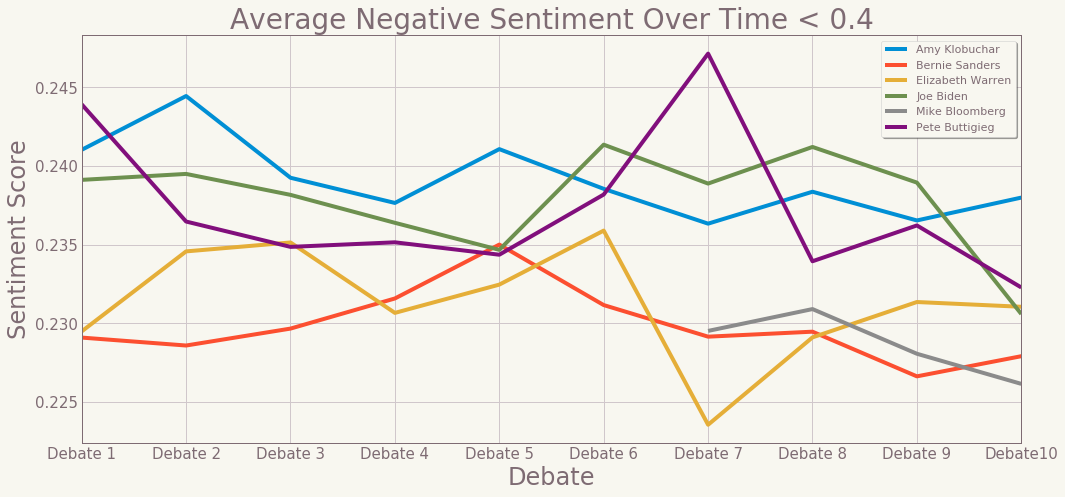

In [17]:
#Set Figure & Color
fig, ax = plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('#f8f7f0')

#Axis Titles and Edits/Set Color of Fig
ax.set_title("Average Negative Sentiment Over Time < 0.4", size = 28)
plt.ylabel('Sentiment Score', size = 24)
plt.xlabel('Debates', size = 24)
plt.style.use('fivethirtyeight')
ax.patch.set_facecolor('#f8f7f0')

ax.tick_params(axis='both', labelsize=15)

#This is just the plot
df.loc[df.Sentiment_Score <= 0.35].groupby(['Debate', 'Candidates'])['Sentiment_Score'].mean().unstack().plot(ax=ax)

#Setting Legend
legend = ax.legend(shadow=True)
legend.get_frame().set_facecolor('#f8f7f0')

#Text Color & Border Color
COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.grid(color='#d0c7cb')
ax.spines['top'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['bottom'].set_color(COLOR)

#Set Border
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

plt.show()

### Total Data Points

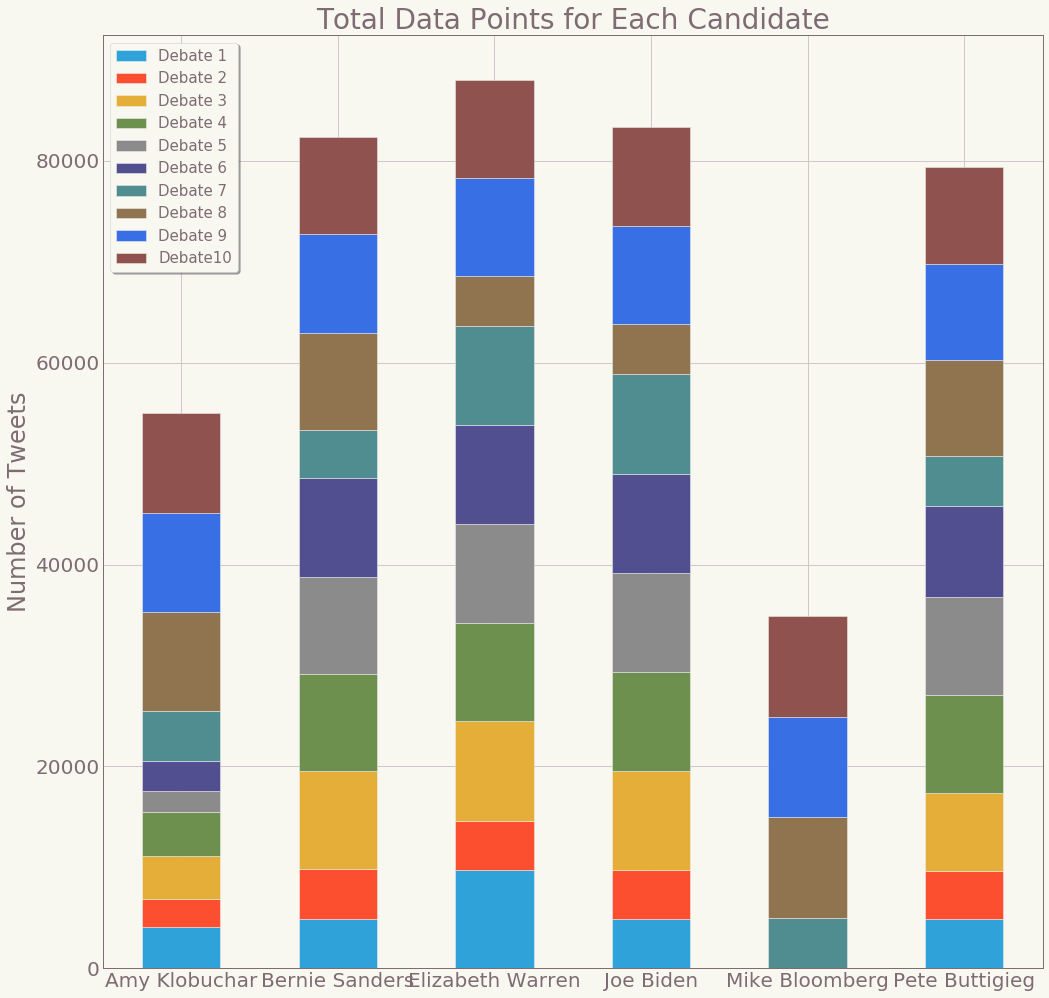

In [19]:
#Set Figure
fig, ax = plt.subplots(figsize=(15,16))

#Axis Titles and Edits/Set Color of Fig
ax.set_title("Total Data Points for Each Candidate", size = 28)
plt.ylabel('Number of Tweets', size = 24)
# plt.xlabel('Candidates', size = 24)
plt.xticks([])
fig.patch.set_facecolor('#f8f7f0')
ax.patch.set_facecolor('#f8f7f0')
ax.set_xticklabels([])
ax.xaxis.label.set_visible(False)

ax.tick_params(axis='both', labelsize=20)
#Setting Style
plt.style.use('fivethirtyeight')
sns.set_palette(five_thirty_eight)

#This is just the plot
df.groupby(['Candidates', 'Debate'])['Candidates'].count().unstack('Debate').plot(kind = 'bar', stacked = True, ax = ax)

#Set Text Color
COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

#Set Grid Color
plt.grid(color='#d0c7cb')

#Set Border Color
ax.spines['top'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['bottom'].set_color(COLOR)

#Set Border
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

#Space for Title
rcParams['axes.titlepad'] = 30
rcParams['legend.fontsize']= 15

#reverse legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

#Legend Color
legend = ax.legend(shadow=True)
legend.get_frame().set_facecolor('#f8f7f0')

In [20]:
fig.savefig("plot.png", facecolor=fig.get_facecolor(), figsize=(19.20,10.80))

### Bar chart for positive and negative tweets

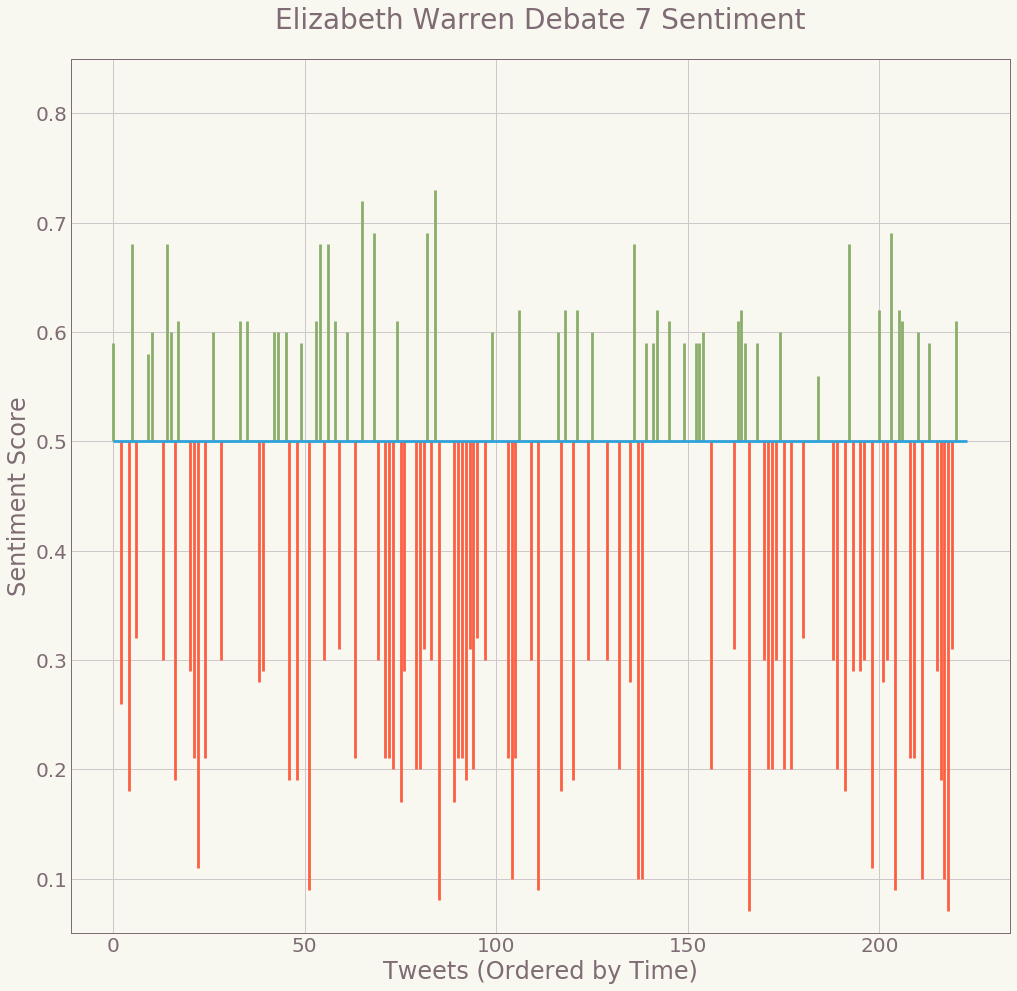

In [22]:
#Set figure and define some params
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
fig.patch.set_facecolor('#f8f7f0')
ax.patch.set_facecolor('#f8f7f0')

#Space for Title
rcParams['axes.titlepad'] = 30

#Title
plt.title("Elizabeth Warren Debate 7 Sentiment" , wrap = True, size = 28)
plt.xlabel('Tweets (Ordered by Time)', size = 24)
plt.ylabel('Sentiment Score', size = 24)

#Set Text Color
COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

#Set Grid Color
plt.grid(color='#d0c7cb')

#Setting Style
plt.style.use('fivethirtyeight')
sns.set_palette(five_thirty_eight)

#Set Border Color
ax.spines['top'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['bottom'].set_color(COLOR)

#Set Border
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

ax.tick_params(axis='both', labelsize=20)
ax.set_ylim([0.05,0.85])

#Filter Data 
df_filtered = df[df.Debate == 'Debate 7']
df_filtered = df_filtered[df_filtered.Candidates == 'Elizabeth Warren']
df_filtered = df_filtered[df_filtered.retweets > 5]

#Manipulation
x = range(len(df_filtered['Sentiment_Score']))
y_err = df_filtered['Sentiment_Score'].copy()
y_err.loc[(y_err >= 0.35) & (y_err <= 0.55)] = 0.5
y_err = y_err - 0.5

#Negsentiment Bars
lower_err = y_err.copy()
lower_err.loc[lower_err >=0] = 0
lower_err = -1*lower_err

#Positive Sent Bars
upper_err = y_err.copy()
upper_err.loc[upper_err <=0] = 0

#Bars
y_err = np.array([lower_err.values, upper_err.values])

# Colors
signs = np.sign(y_err)[1]
cmap = {0: '#fc6044', 1:'#8aae6c'}
col = pd.Series(signs).T.map(cmap).tolist()

y = [0.5]*len(x)
# col = np.where(y<0.5,'#fc6044', '#8aae6c')
# col = ['#fc6044', '#8aae6c']*(len(x)//2)
#Plot
plt.errorbar(x=x, 
             y=y,
             yerr=y_err, linewidth=2.8, ecolor = col
            )
plt.show()


In [23]:
fig.savefig("plot.png", facecolor=fig.get_facecolor(), figsize=(19.20,10.80))

In [24]:
# #THIS DOES THE ABOVE CHART FOR ALL CANDIDATES IN ALL DEBATES

# debate = sorted(list(df.Debate.unique()))
# candidate = list(df.Candidates.unique())

# nrows = len(debate)
# ncols = len(candidate)
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))

# for index,d in enumerate(debate):
    
#     for i,c in enumerate(candidate):
        
#         ax = axes[index][i]
#         ax.set_title(d + ': '+ c)
        
#         df_filtered = df[df.Debate == d]
#         df_filtered = df_filtered[df_filtered.Candidates == c]
#         df_filtered = df_filtered[df_filtered.retweets > 5]

#         x = range(len(df_filtered['Sentiment_Score']))
#         y_err = df_filtered['Sentiment_Score'].copy()
#         y_err.loc[(y_err >= 0.35) & (y_err <= 0.55)] = 0.5 # Potentially Remove This Line
#         y_err = y_err - 0.5

#         lower_err = y_err.copy()
#         lower_err.loc[lower_err >=0] = 0
#         lower_err = -1*lower_err

#         upper_err = y_err.copy()
#         upper_err.loc[upper_err <=0] = 0

#         y_err = np.array([lower_err.values, upper_err.values])

#         ax.errorbar(x=x, 
#                      y=[0.5]*len(x),
#                      yerr=y_err
#                     ) 

### Percent positive negative sentiment for candidates

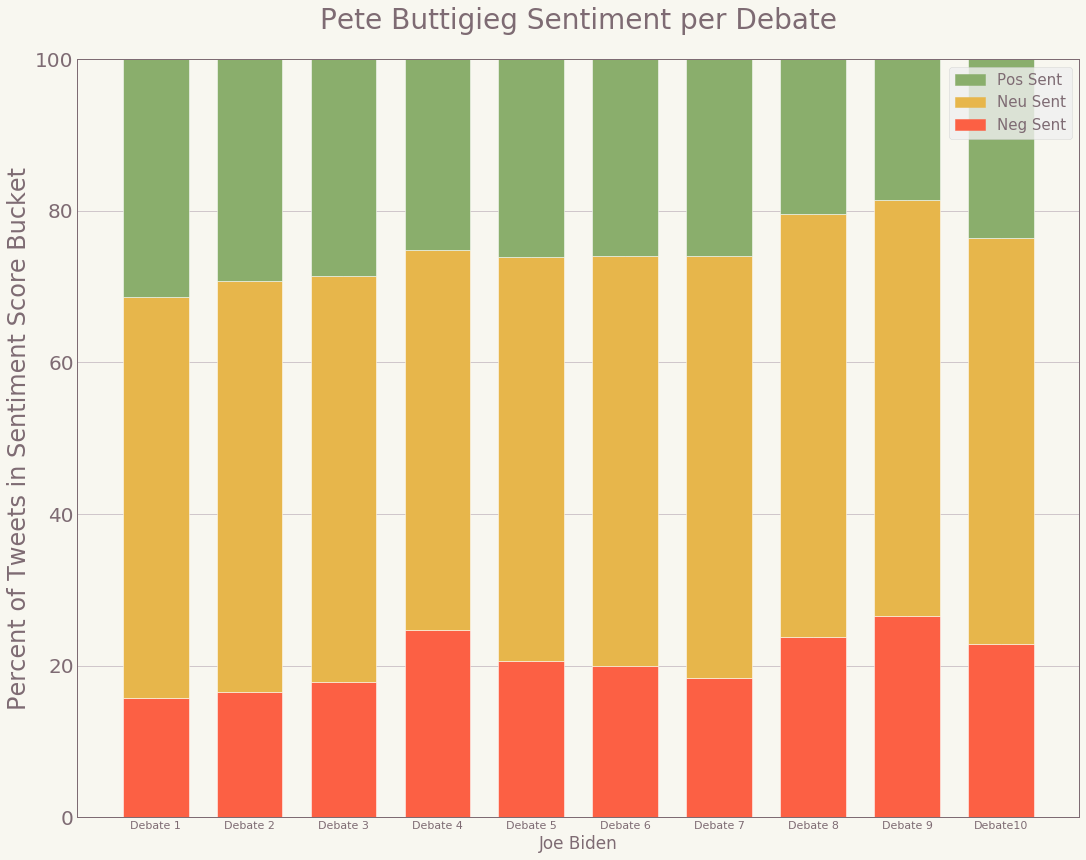

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 13))

#Empty Lists for Loop 
r = debate
negSentlist = []
neuSentlist = []
posSentlist = []

#Setting background color
fig.patch.set_facecolor('#f8f7f0')
ax.patch.set_facecolor('#f8f7f0')

#Title
plt.title("Pete Buttigieg Sentiment per Debate" , wrap = True, size = 28)
plt.ylabel('Percent of Tweets in Sentiment Score Bucket', size = 24)

#Set Text Color
COLOR = '#7e6b73'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

#Set Grid Color
plt.grid(color='#d0c7cb')

#Setting Style
plt.style.use('fivethirtyeight')
sns.set_palette(five_thirty_eight)

#Set Border Color
ax.spines['top'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
ax.spines['right'].set_color(COLOR)
ax.spines['bottom'].set_color(COLOR)

#Set Border
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

#For Loop to split data into positive negative and neutral sentiment for plotting
for d in debate:
    
    df_filtered = df[df.Debate == d]
    df_filtered = df_filtered[df_filtered.Candidates == 'Pete Buttigieg']

    totals = len(df_filtered)
    negSent = len(df_filtered[df_filtered.Sentiment_Score < 0.35]) / totals * 100
    neuSent = len(df_filtered[(df_filtered.Sentiment_Score >= 0.35) & (df_filtered.Sentiment_Score <= 0.55)]) / totals * 100
    posSent = len(df_filtered[df_filtered.Sentiment_Score > 0.55]) / totals * 100
    
    negSentlist.append(negSent)
    neuSentlist.append(neuSent)
    posSentlist.append(posSent)

# plot
barWidth = 0.7

# Create green Bars
plt.bar(r, negSentlist, color='#fc6044', edgecolor='white', width=barWidth)
plt.bar(r, neuSentlist, bottom=negSentlist, color='#e7b64b', edgecolor='white', width=barWidth)
plt.bar(r, posSentlist, bottom=[i+j for i,j in zip(negSentlist, neuSentlist)], color='#8aae6c', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(debate)
plt.xlabel("Joe Biden")
ax.tick_params(axis='y', labelsize=20)

ax.set_ylim([0,100])

rcParams['axes.titlepad'] = 15

handles, labels = ax.get_legend_handles_labels()
red_patch = mpatches.Patch(color='#fc6044', label='Neg Sent')
yellow_patch = mpatches.Patch(color='#e7b64b', label='Neu Sent')
green_patch = mpatches.Patch(color='#8aae6c', label='Pos Sent')
plt.legend(handles=[green_patch, yellow_patch, red_patch])
# legend = plt.legend(shadow=True)
legend.get_frame().set_facecolor('#f8f7f0')

# Show graphic
plt.show()



In [26]:
fig.savefig("plot.png", facecolor=fig.get_facecolor(), figsize=(19.20,10.80))

### Most Popular Hashtags for Each Candidate

In [27]:
df_hashtags = df[df.hashtags.notna() == True]

In [28]:
df_hashtags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54484 entries, 0 to 477021
Data columns (total 20 columns):
id                 54484 non-null int64
author_id          54484 non-null int64
text               54484 non-null object
retweets           54484 non-null int64
permalink          54484 non-null object
date               54484 non-null object
formatted_date     54484 non-null object
favorites          54484 non-null int64
mentions           24207 non-null object
hashtags           54484 non-null object
urls               18076 non-null object
Candidates         54484 non-null object
day                54484 non-null int64
month              54484 non-null int64
year               54484 non-null int64
hour               54484 non-null int64
text_clean         54484 non-null object
Sentiment_Score    54484 non-null float64
sent*RT            54484 non-null float64
Debate             54484 non-null object
dtypes: float64(2), int64(8), object(10)
memory usage: 8.7+ MB


In [29]:
df_hashtags[df_hashtags.Candidates == 'Pete Buttigieg'].hashtags.value_counts()

#DemDebate                                                                                        799
#TeamPete                                                                                         296
#DemocraticDebate                                                                                 234
#PetesBillionaires                                                                                196
#PeteForAmerica #Pete2020                                                                         143
                                                                                                 ... 
#YouGotThis #PeteButtigieg #POTUSPete #DemocraticDebate                                             1
#PeteForAmerica #Pete2020 #ChangeTheChannel #WinTheEra #TeamPete                                    1
#MayoPete #neverpete #Bernie2020                                                                    1
#PeteStorm #DemDebate                                                             

In [30]:
gp = df_hashtags[df_hashtags.Candidates == 'Mike Bloomberg'].hashtags.value_counts().to_frame().reset_index()
gp.columns = ['hashtags', 'counts']

# new data frame with split value columns 
new = gp["hashtags"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
gp["hashtags1"]= new[0] 
  
# making separate last name column from new data frame 
gp["second"]= new[1] 
  
# Dropping old Name columns 
gp.drop(columns =['hashtags'], inplace = True) 

#removing tweets with less than 100 
gp = gp[gp.counts > 5]

gp = gp.drop(columns=['second'])

gp = gp[gp.hashtags1 != '#DemDebate']
gp = gp[gp.hashtags1 != '#DemocraticDebate']

### Word Cloud with Twitter Logo

In [31]:
colors = ["#30a2da","#fc4f30","#e5ae38","#6d904f","#8b8b8b","#524f90"]
def rand_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return random.choice(colors)

mask = np.array(Image.open('/home/svideloc/Documents/flatironschool/Projects/DebateNightTwitterAnalysis/twitter_logo.jpg'))
wc = WordCloud(background_color="#f8f7f0", max_words=1000, mask=mask)

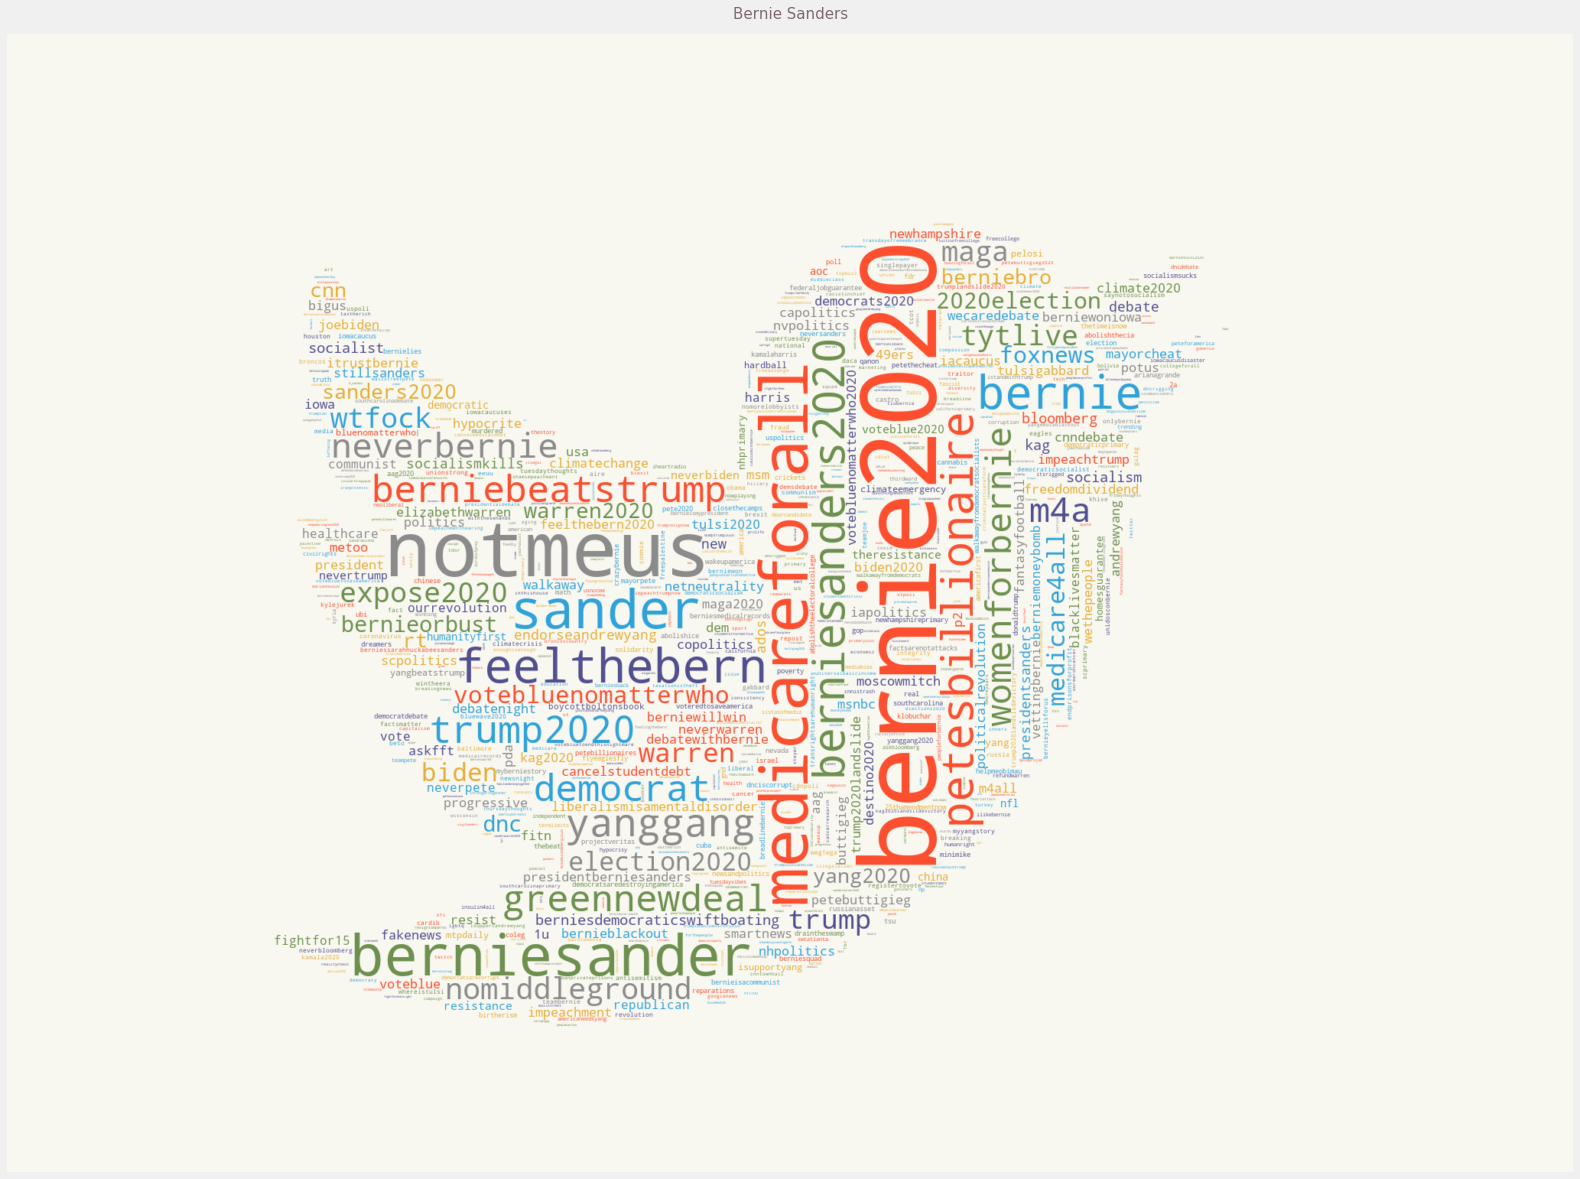

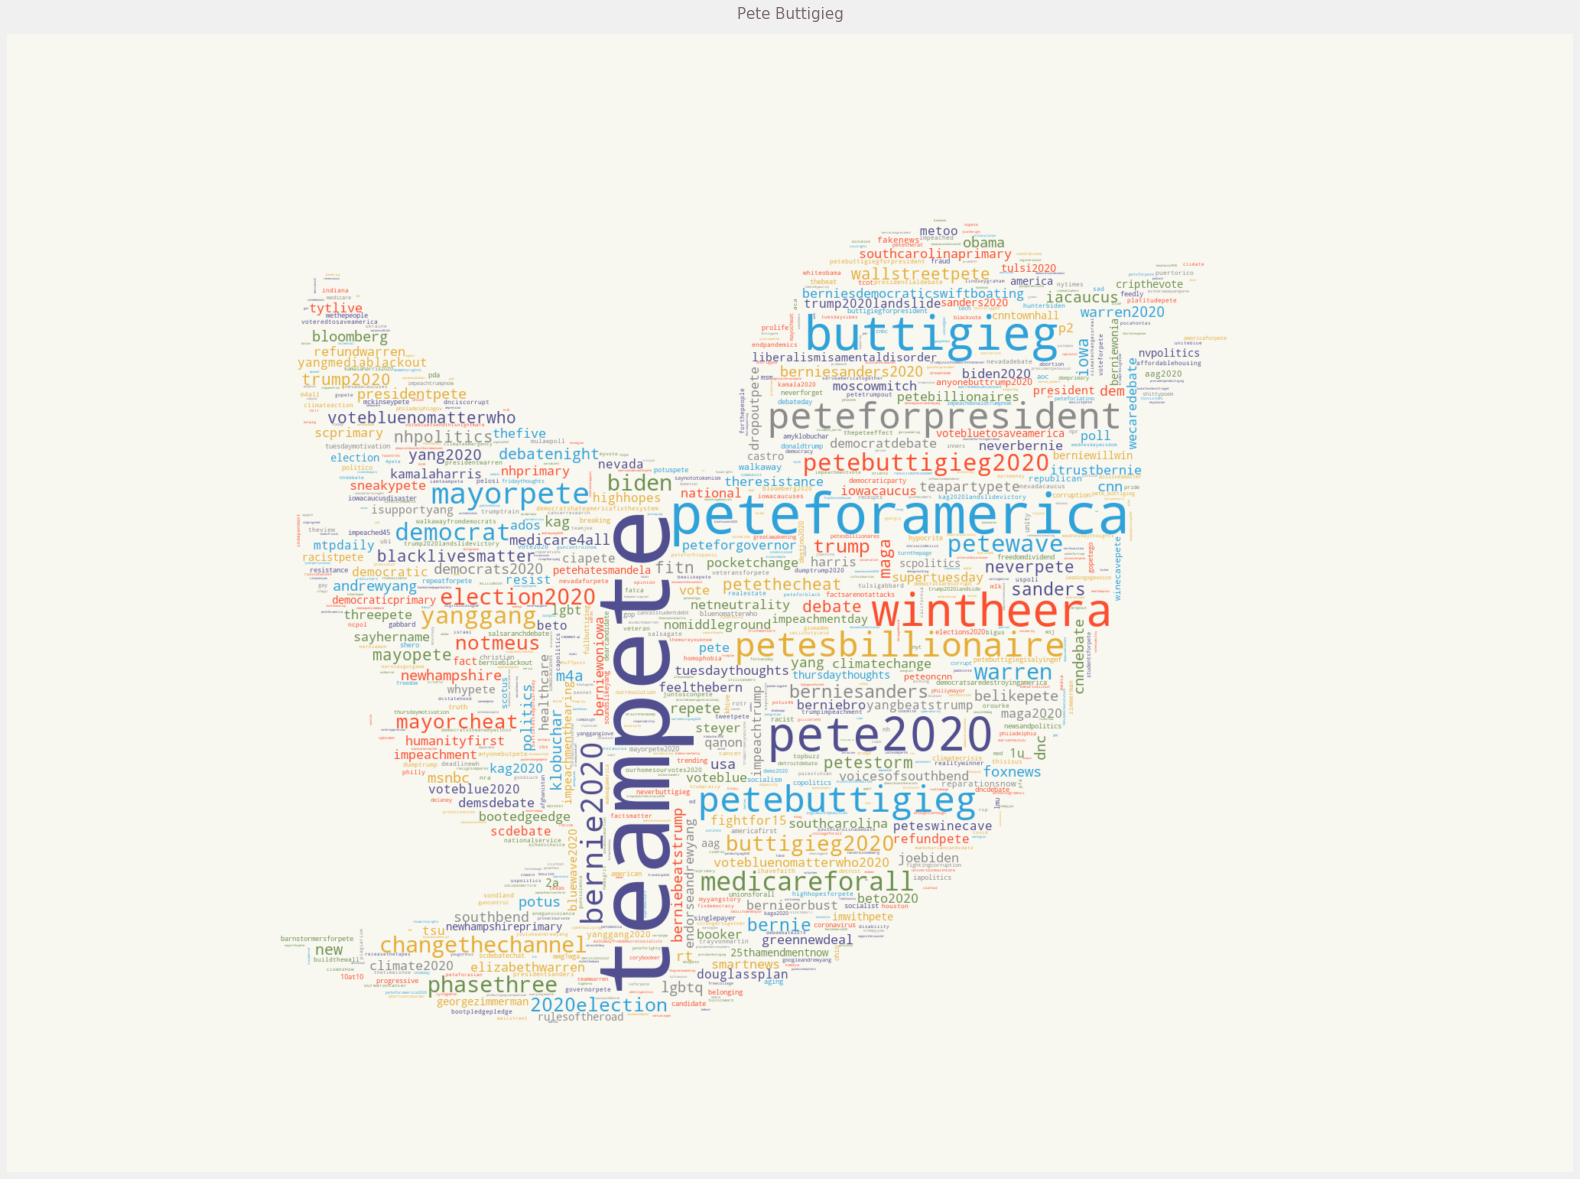

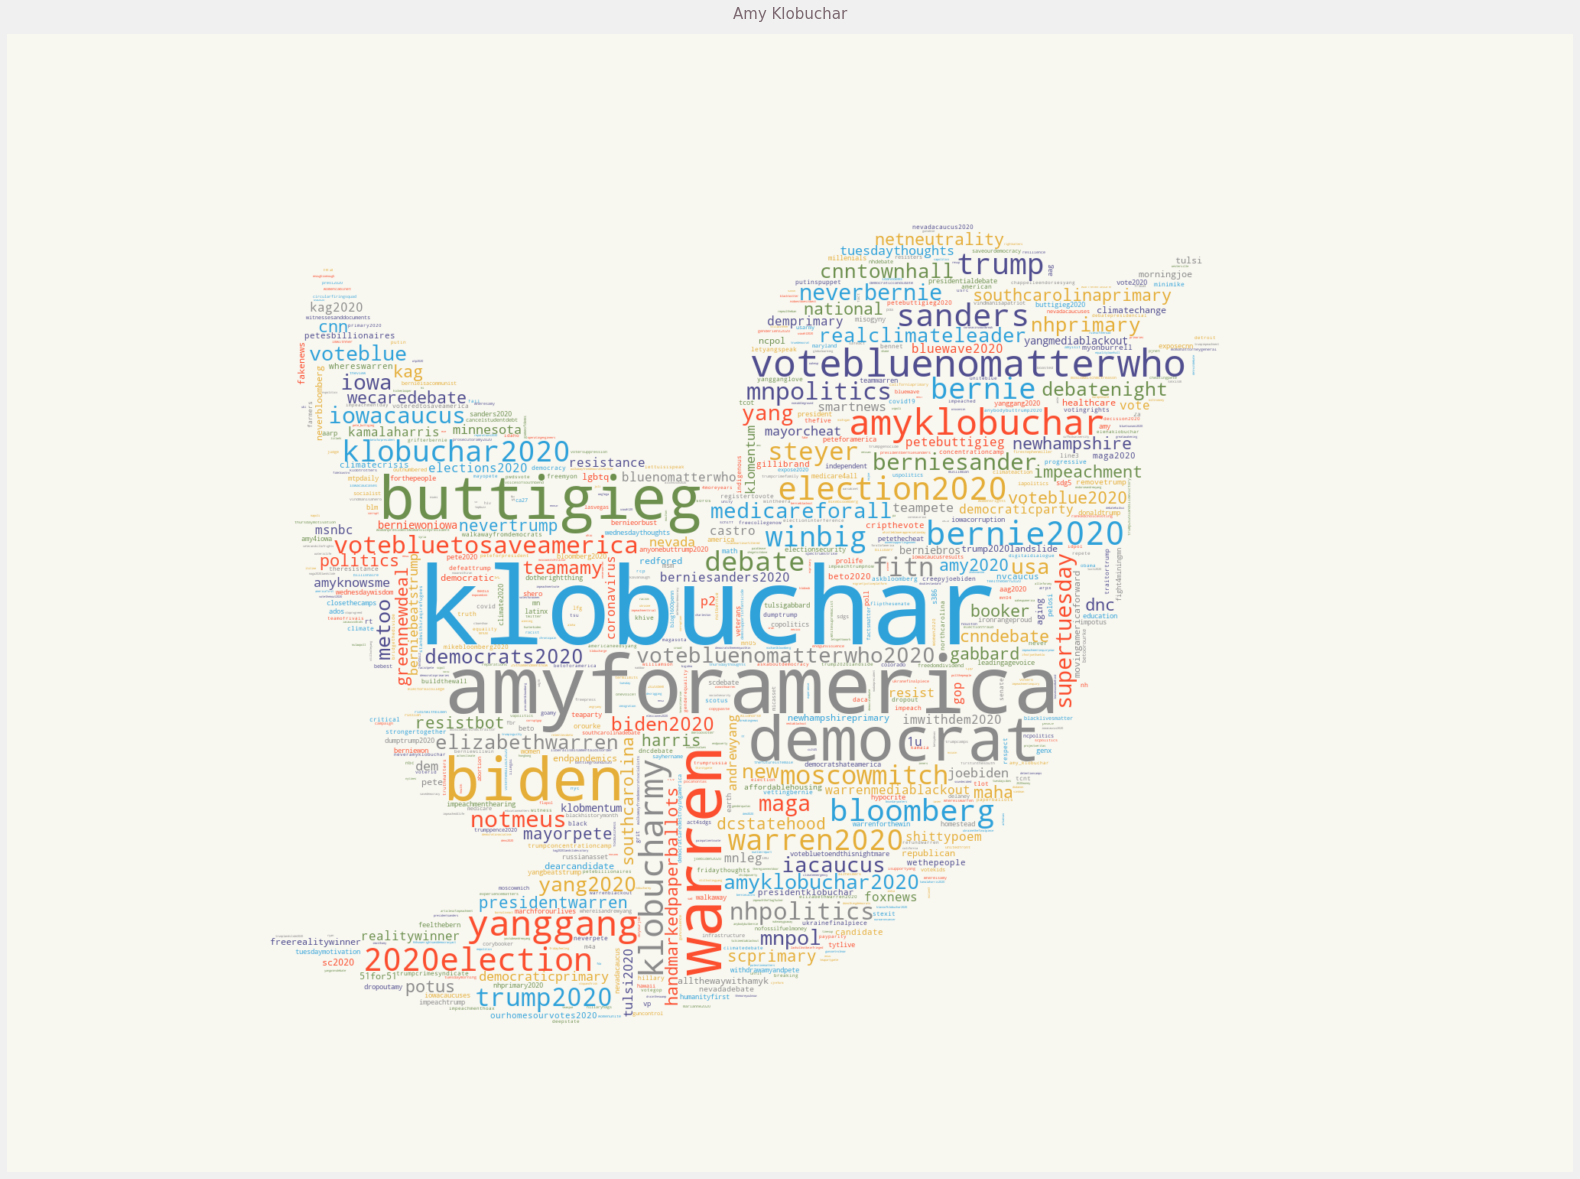

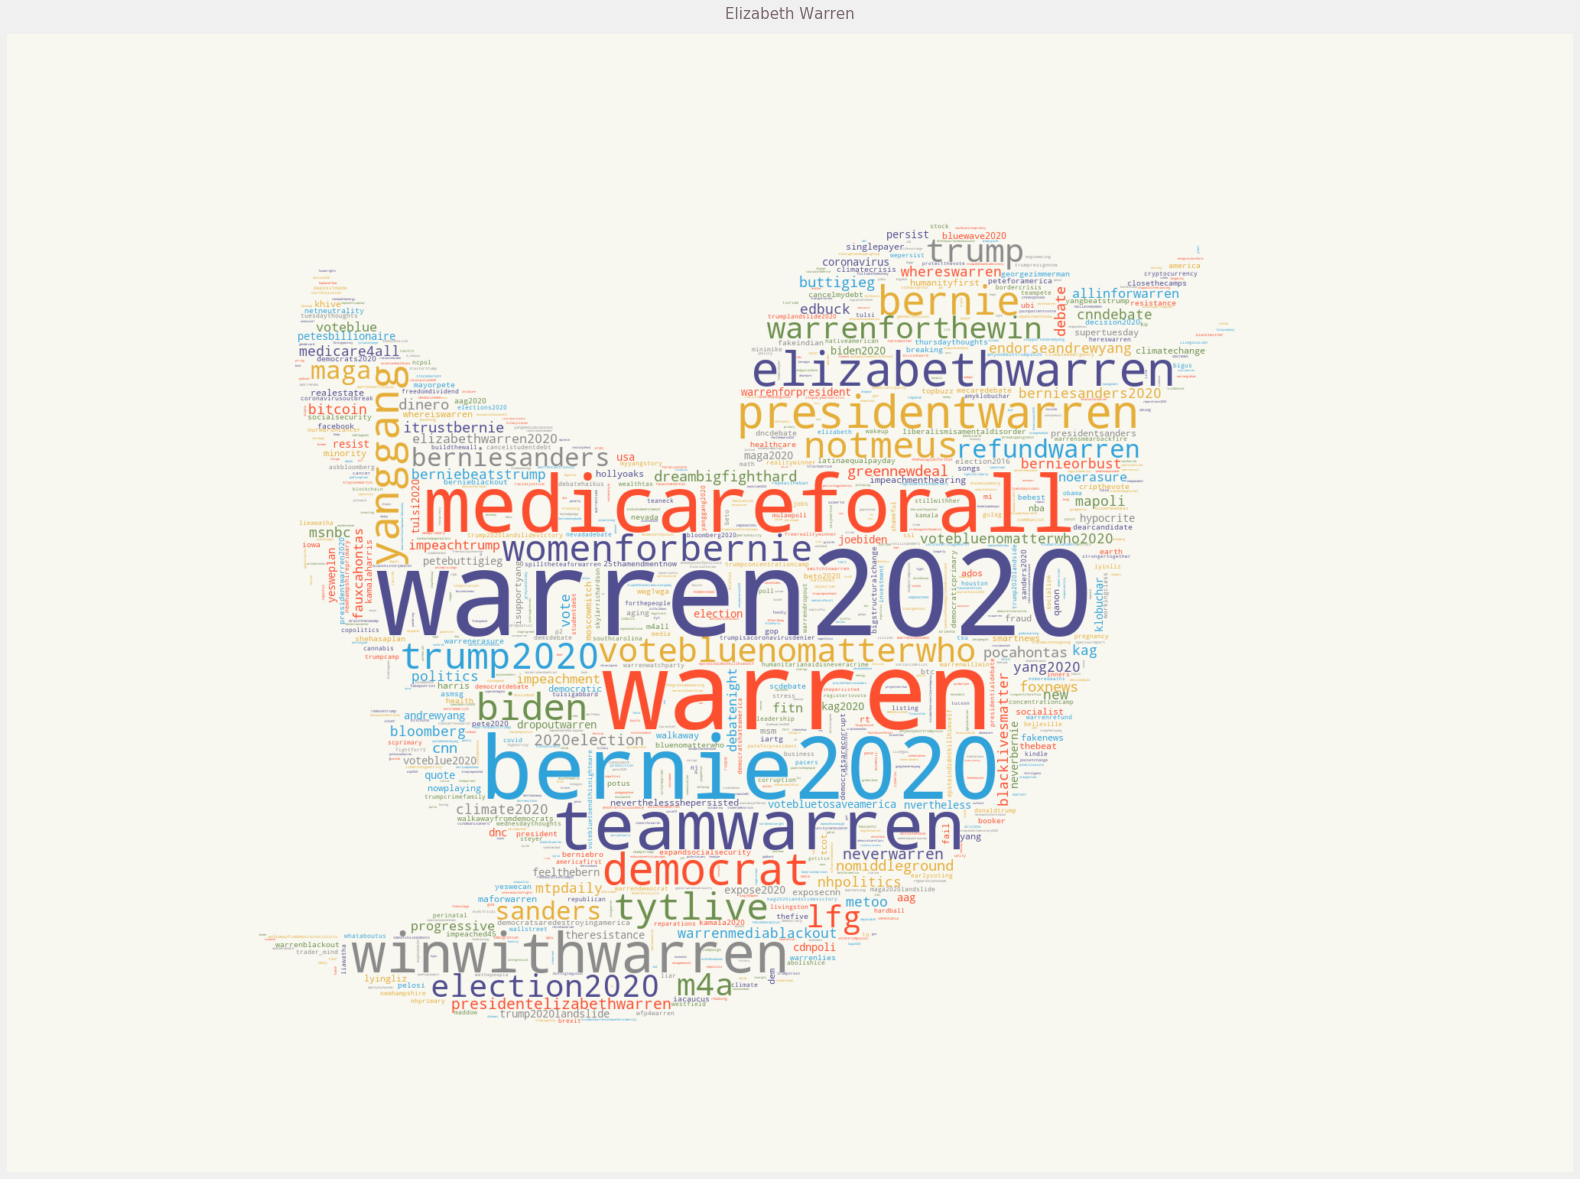

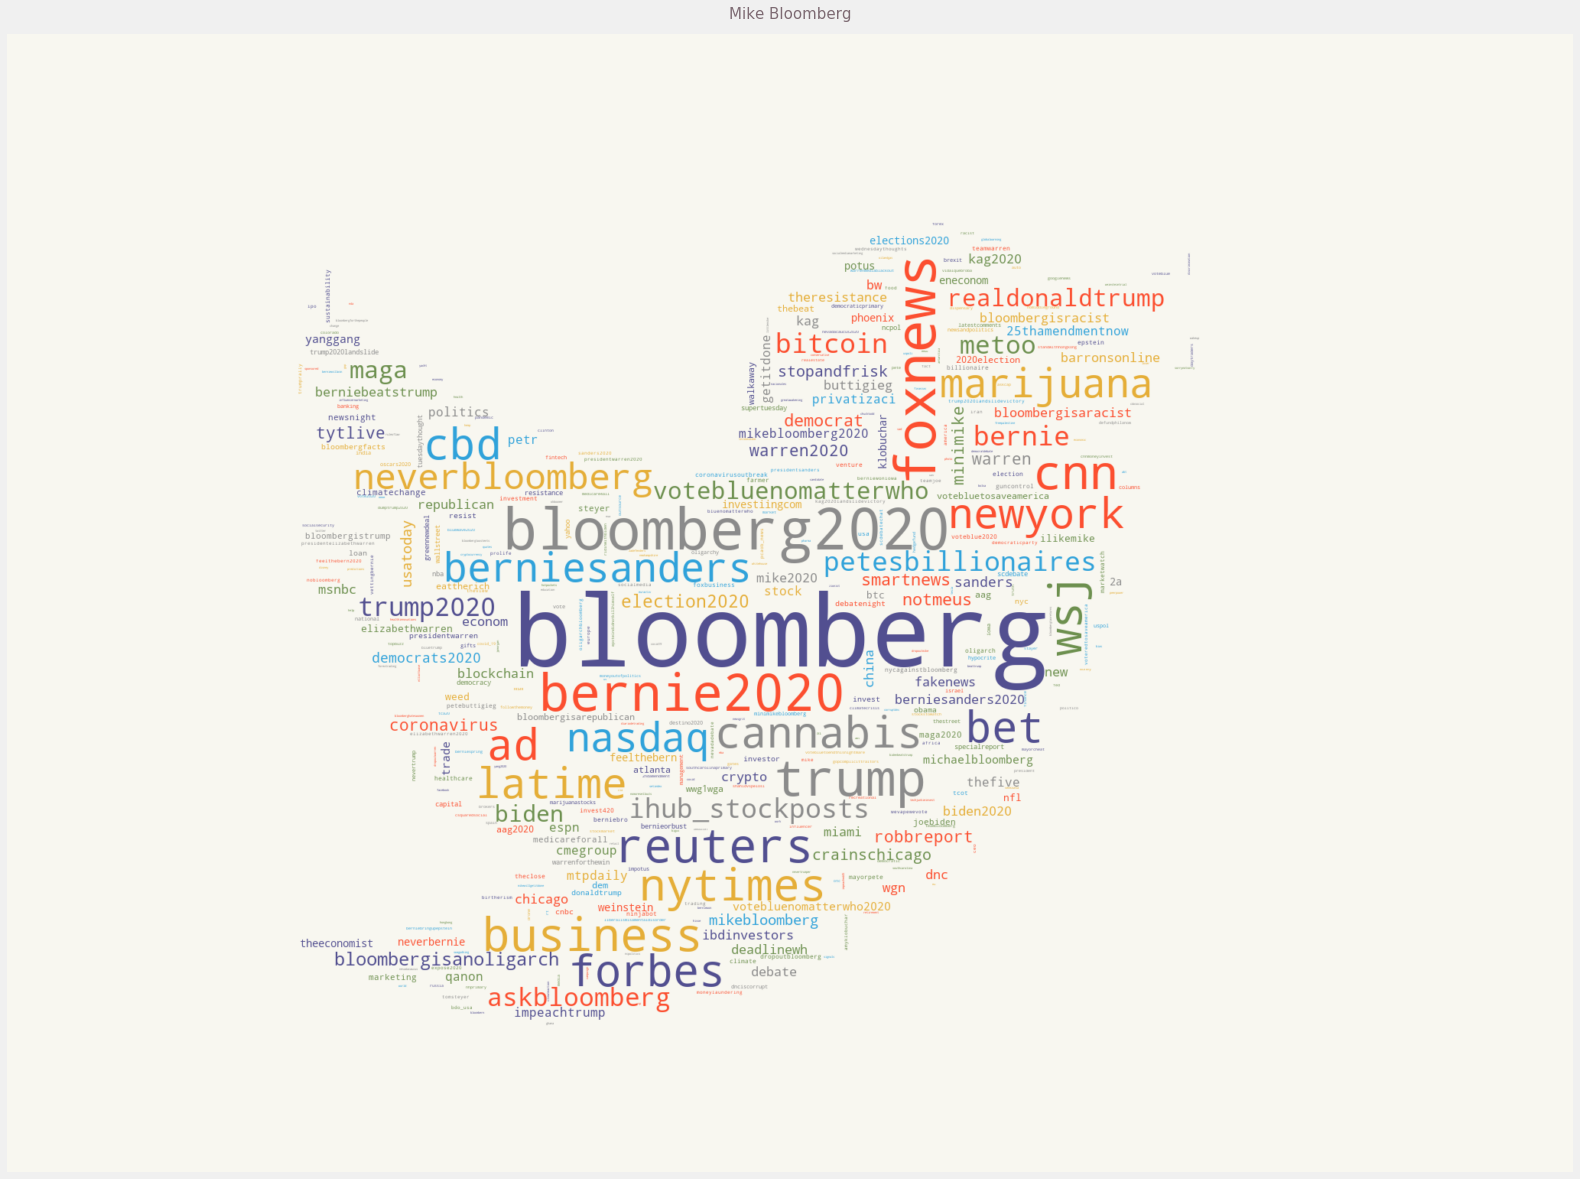

In [32]:
# fig, axes = plt.subplots(nrows=ncols, ncols=1, figsize=(50, 50))
for c in candidate:
    
#     ax = axes[index]
    words = np.array(df_hashtags[df_hashtags.Candidates == c].hashtags).tolist()
    words = [w.lower() for w in words]
    
    clean_string = ','.join(words)
    clean_string = clean_string.replace(',', ' ').replace(' ', ' ') #hidden character spaces
    clean_string = clean_string.replace("#demdebate", "").replace("democraticdebate","")
    clean_words = clean_string.split(" ")
    random.shuffle(clean_words)
    clean_string = " ".join(clean_words)
    wc.generate(clean_string)
    
    f = plt.figure(figsize=(25,25))
    plt.imshow(wc.recolor(color_func=rand_color_func, random_state=3),
           interpolation="bilinear")
    plt.title(c, size=15)
    plt.axis("off")
    f.savefig(f"{c}.png", facecolor=fig.get_facecolor(), figsize=(19.20,10.80))
    plt.show()

In [33]:
data = pd.Series(clean_string.replace(',', ' ').split(" ")).value_counts().to_frame().rename({0: 'counts'}, axis=1).reset_index().rename({'index': 'hashtag'}, axis=1)
topten = data.head(10)

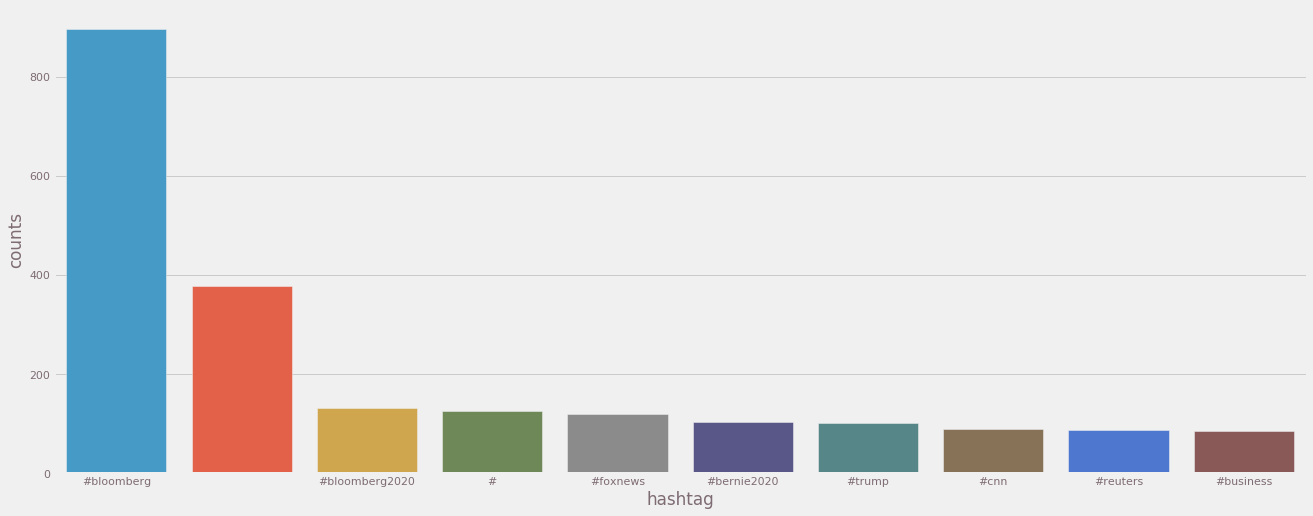

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(x='hashtag', y='counts', data=topten)
plt.show()

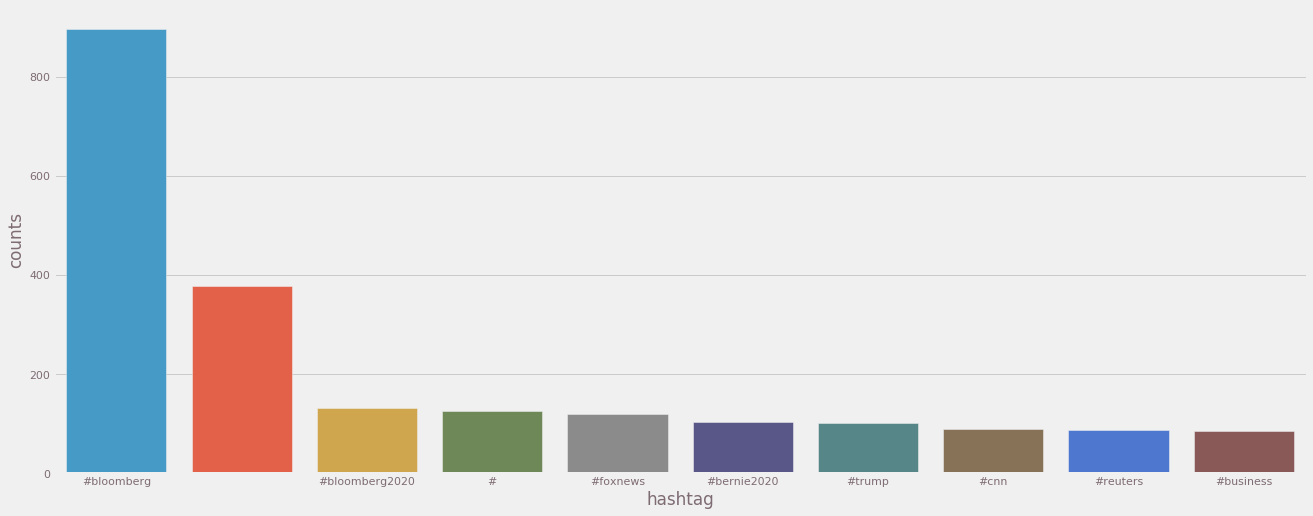

In [35]:
nopete = data.loc[~data.hashtag.str.contains('pete')].copy()
nopete = nopete.head(10)

plt.figure(figsize=(20,8))
sns.barplot(x='hashtag', y='counts', data=nopete)
plt.show()

In [42]:
test = df.sort_values(by='Sentiment_Score')[['text', 'Candidates', 'Debate', 'retweets', 'Sentiment_Score']].reset_index()

In [187]:
test[test.Candidates == 'Bernie Sanders'].text[373]
# test[(test.Candidates == 'Mike Bloomberg') & (test.Debate == 'Debate10')].text[419342]

'Bernie Sanders wants 77% death tax. 77%. So I can leave my son 23% of what I have worked my entire life to acquire?'

In [188]:
test[test.Candidates == 'Bernie Sanders'].Sentiment_Score[373]
# test[(test.Candidates == 'Mike Bloomberg') & (test.Debate == 'Debate10')].Sentiment_Score[422888]

0.05

In [186]:
test[test.Candidates == 'Bernie Sanders'].text.head(75)  #[423242]

2      81% of Americans have smart phones 68% own pet...
5                     @kate__sanders the worst film ever
8      A trillion seconds is 31,688 years. A million ...
14     Clark 3770 (90 attended) is apportioned 13 del...
18     Superfluous, often unfounded and bad-faith, re...
                             ...                        
353    These stories mirror what happened to my grand...
357    Seriously? This is is a horribly petty respons...
358    This is so stupid to say. You just lost the wh...
368     you’re going to talk about greed? Which one o...
373    Bernie Sanders wants 77% death tax. 77%. So I ...
Name: text, Length: 75, dtype: object

In [91]:
test.text[101]

'Biden is running on the platform of "get rid of Trump and everything will go back to \'normal\' " That would be such a disaster! I hope Yang points that out BIG TIME'